In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#%matplotlib inline
from __future__ import division
import matplotlib
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import h5py
import os
import re
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4)})
plotStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
np.seterr(divide='ignore',invalid='ignore')
from matplotlib import pyplot
from matplotlib.colors import LogNorm
pass

In [3]:
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
# Directory work

In [5]:
%%bash
pwd

/home/bciezah1/Documents/scripts/scripts-05-19-2021


In [6]:
# Functions

In [7]:
# Setup plot styles for saving figures.
def figure_style():
    global plotStyles,stepStyles,plotColors,plotSymbols
    matplotlib.rcParams.update({"axes.formatter.limits": (-8,8), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'sans-serif','font.sans-serif':'Helvetica','font.size': 9, "axes.titlesize": 10, "xtick.labelsize": 8, "ytick.labelsize": 8,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
    plotStyles={"markersize":4,"markeredgewidth":1.0,"linewidth":1.0,"markerfacecolor":None}
    stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
    plotColors=plt.rcParams['axes.prop_cycle'].by_key()['color']
    plotSymbols=['x','o','^']

In [8]:
# Setup plot styles for on-screen plotting.
def screen_style(fontSize=20):
    global plotStyles,stepStyles,plotColors,plotSymbols
    matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'sans-serif','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
    plotStyles={"markersize":12,"markeredgewidth":3.0,"linewidth":3.0}
    stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
    plotColors=plt.rcParams['axes.prop_cycle'].by_key()['color']
    plotSymbols=['x','o','^']

In [9]:
# Setup plot styles for saving figures.
def movie_style(multiplier):
    global plotStyles,stepStyles,plotColors,plotSymbols
    matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'sans-serif','font.sans-serif':'Helvetica','font.size': multiplier*6, "axes.titlesize": multiplier*7, "xtick.labelsize": multiplier*5, "ytick.labelsize": multiplier*5,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
    plotStyles={"markersize":4,"markeredgewidth":1.0,"linewidth":1.0}
    stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
    plotColors=plt.rcParams['axes.prop_cycle'].by_key()['color']
    plotSymbols=['x','o','^'] 

In [10]:
# define some project specific functions

In [11]:
import scipy.optimize as opt
import scipy.integrate as integrate
screen_style()
pass

In [12]:
from matplotlib.backends.backend_pdf import PdfPages
figuredir = "figures"
if not os.path.exists(figuredir): os.mkdir(figuredir)

# k1 vs k3 - phase diagram

## With Nucleation

### first option

In [13]:
N1=np.logspace(-10, -1, num=50) # points sampled in the matrix to plot
N1;

In [14]:
N1=np.logspace(-10, -1, num=50);# adding above points to a list to be used for the plot
seq=[]
for i in N1:
    seq.append('{:0.0e}'.format(i))
seq;

In [15]:
# reading data
dir='/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig5/fig5a/data/'
temp2=np.zeros((50,50,1),dtype=float)  # dimension is important
data=["data_pair_dis_25Ksim_100Lx100L_rep5_lat_50_with_nuc.txt",\
      "data_pair_dis_25Ksim_100Lx100L_rep6_lat_50_with_nuc.txt",\
      "data_pair_dis_25Ksim_100Lx100L_rep8_lat_50_with_nuc.txt"]
for i in data:
    filename=dir+i
    #print(filename)
    data=np.loadtxt(filename)
    data_pair_dis=data.reshape((50,50,1))
    #print(data.shape)
    temp2=np.concatenate((temp2,data_pair_dis),axis=2)
print("ready",temp2.shape)   

ready (50, 50, 4)


(array([-5., -4., -3., -2., -1.,  0.,  1.,  2.]),
 <a list of 8 Text yticklabel objects>)

/home/local/WIN/bciezah1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


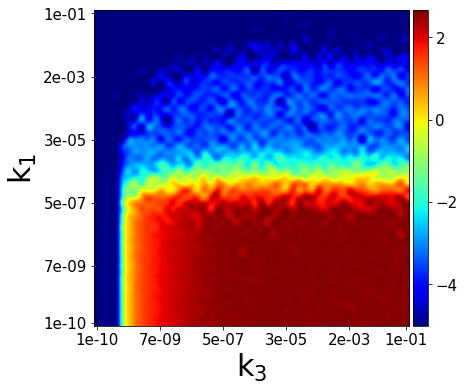

In [16]:
import matplotlib.ticker as mtick
figure(figsize = (6,6))
ax1=plt.subplot(1, 1, 1)
#newmatrix=log(-1*(np.flip(np.average(temp2[:,:,1:2],axis=2),0)-np.max(np.average(temp1[:,:,1:6],axis=2))))
newmatrix=log(-1*(np.flip(np.average(temp2[:,:,1:4],axis=2),0)-38.271))
newmatrix[newmatrix<-5]=-5
m = ax1.imshow(newmatrix,cmap = 'jet',interpolation="lanczos")
#m = ax1.imshow(np.flip(np.average(temp1[:,:,1:6],axis=2),0),cmap = 'jet',vmin=37, vmax=38.28)
y_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]] # choose sampled points to show in the axis
ax1.set_yticks([49,40,30,20,10,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=15)
x_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]]
ax1.set_xticks([0,10,20,30,40,49])
ax1.set_xticklabels(x_label_list,fontsize=15)
plt.ylabel('$\mathregular{k_1}$',fontsize=30)
plt.xlabel('$\mathregular{k_3}$',fontsize=30)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=15)

# Sensitivity To Nucleation

## 1. Loading Algorightm

In [25]:
        #lfull=np.array(fp["/Sweep/%s/Simulations/%s/Lattice/%s"%(parameter,replicate,lattice)])
        latticelength=30
        # Get particle coordinates for X1
        lc1 = np.sum(lfull == 0, axis=3).reshape((lfull.shape[0], lfull.shape[1]))

        # Get particle coordinates for X2
        lc2 = np.sum(lfull == 1, axis=3).reshape((lfull.shape[0], lfull.shape[1]))

        # Get realistic "experimental" lattice data (from fluorescence intensities)
        overall_lattice = lc1 + 2 * lc2
        normalized_lattice = overall_lattice / 10

        x_coord, y_coord = normalized_lattice.nonzero()

        # calculate the pairwise distances (accounting for periodic boundary conditions)
        squared_distances = 0
        for distance_1D in [x_coord, y_coord]:
            # Get the 1D distances
            pd = pdist(distance_1D.reshape(distance_1D.shape[0], 1))

            # apply periodic boundary conditions
            pd[pd > latticelength * 0.5] = latticelength - pd[pd > latticelength * 0.5]

            squared_distances += pd ** 2
        pairwise_distances = np.sqrt(squared_distances)

        # weight the pairwise distances by the normalized fluorescence intensities
        weights_for_dist = []
        for i in range(len(x_coord) - 1):
            for j in range(i + 1, len(x_coord)):
                weights_for_dist.append(
                    normalized_lattice[x_coord[i], y_coord[i]] * normalized_lattice[x_coord[j], y_coord[j]])

        weighted_average_pairwise_distance = np.average(pairwise_distances, weights=weights_for_dist)
print("ready")

ready


## 2. Run over sampling

In [20]:
dir='/media/Data/MARCC/Sensitivity_To_Nucleation/Nucleation_Size/Initial_1040/'
filename1 =dir+"x1_8.400e+02_nucleated.lm"
endTimestep=600
fp1 = h5py.File(filename1, "r")
#figure(figsize = (20,10))
for replicate in range(1,11):
    counts=fp1["/Simulations/%07d/SpeciesCounts"%replicate]
    times=fp1["/Simulations/%07d/SpeciesCountTimes"%replicate]
pass

In [21]:
N1=[840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040]
nrep=10
PhaseMatrixBOB=np.zeros((len(N1),1,nrep), dtype=float)
for replicate in range(1,nrep+1):
    countx1=-1
    countx2=0
    for x1 in N1:      #diff coef #x1
        countx1=countx1+1
        n0=0
        counts=np.zeros((len(times),1), dtype=int)
        #mymatrix=np.zeros((xdim,ydim), dtype=int)    # zero matrix to save x2 counting
        filename = dir+"x1_%0.3e_nucleated.lm"%(x1)
        fp1 = h5py.File(filename, "r")
        #lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
        lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
        #for lattice in lattices: 
        lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
        #    if  499<int(lattice)<501:

        # Get particle coordinates for X1
        lc1 = np.sum(lfull == 0, axis=3).reshape((lfull.shape[0], lfull.shape[1]))

        # Get particle coordinates for X2
        lc2 = np.sum(lfull == 1, axis=3).reshape((lfull.shape[0], lfull.shape[1]))

        # Get particle coordinates for X3
        lc3 = np.sum(lfull == 2, axis=3).reshape((lfull.shape[0], lfull.shape[1]))

        # Get realistic "experimental" lattice data (from fluorescence intensities)
        overall_lattice = lc1 + 2 * lc2 + 2 * lc3
        #print(lc1+lc2+lc3)
        #print(np.shape(lc1))
        #print(np.sum(overall_lattice))
        normalized_lattice = overall_lattice / 10

        x_coord, y_coord = normalized_lattice.nonzero()

        # calculate the pairwise distances (accounting for periodic boundary conditions)
        squared_distances = 0
        for distance_1D in [x_coord, y_coord]:
            # Get the 1D distances
            pd = pdist(distance_1D.reshape(distance_1D.shape[0], 1))

            # apply periodic boundary conditions
            pd[pd > latticelength * 0.5] = latticelength - pd[pd > latticelength * 0.5]

            squared_distances += pd ** 2
        pairwise_distances = np.sqrt(squared_distances)

        # weight the pairwise distances by the normalized fluorescence intensities
        weights_for_dist = []
        for i in range(len(x_coord) - 1):
            for j in range(i + 1, len(x_coord)):
                    weights_for_dist.append(
                        normalized_lattice[x_coord[i], y_coord[i]] * normalized_lattice[x_coord[j], y_coord[j]])

        weighted_average_pairwise_distance = float(np.average(pairwise_distances, weights=weights_for_dist))
        PhaseMatrixBOB[:,:,replicate-1][countx1][countx2]=float(weighted_average_pairwise_distance)
print("ready")

ready


In [22]:
lfull.shape

(30, 30, 1, 32)

In [23]:
#np.max(PhaseMatrixBOBeMatrixBOBseMatrixBOB)

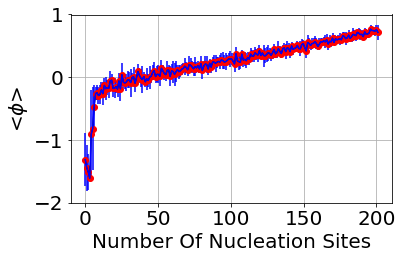

In [24]:
NumberNucSites = np.linspace(0,201,201) # Defining X-axis
avephi=np.average(log(-flip(PhaseMatrixBOB)+11.7),axis=2) # Calculate Average Phi
myphierror=np.std(log(-flip(PhaseMatrixBOB)+11.7),axis=2) # Calculate Error in the Phi value
plot(NumberNucSites,avephi,'or',linewidth=5) # plot red points
plot(NumberNucSites,avephi,color='black',linewidth=1) # plot black line
errorbar(NumberNucSites,avephi,myphierror,uplims=False,lolims=False,color='blue') # add error bars
ylim([-2,+1])
#xscale("log")
plt.grid(True) # add grid
ylabel('<$\phi$>');
xlabel("Number Of Nucleation Sites")
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_xticklabels(x_label_list,fontsize=40)
tight_layout()

### first option - 30x30

Text(-0.15, 0.67, 'b')

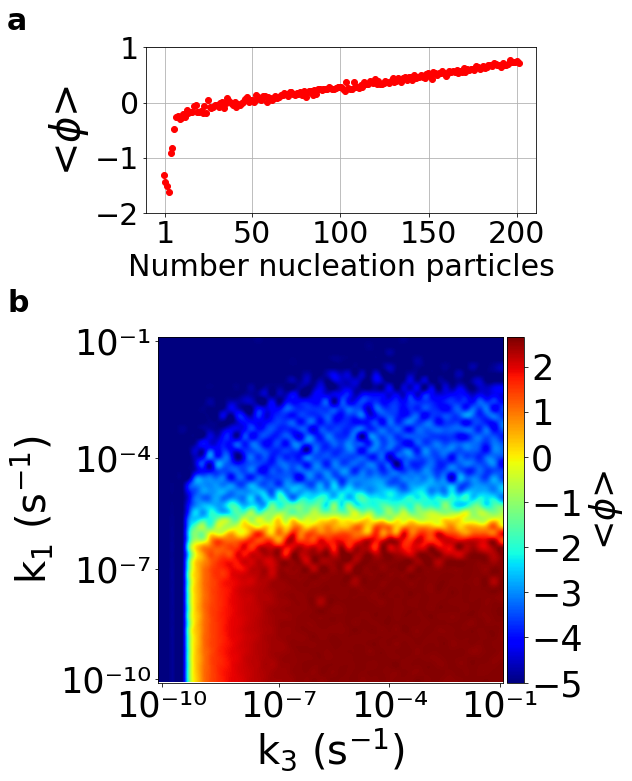

In [74]:
fig = plt.figure(figsize=(7,16))
gs = gridspec.GridSpec(nrows=4,ncols=2,figure=fig, width_ratios= [1,1],height_ratios=[1.5,1,1,1], wspace=1,hspace=1)
#########################
ax1 = fig.add_subplot(gs[1:3, 0:2]) #a
newmatrix=log(-1*(np.flip(np.average(temp2[:,:,1:4],axis=2),0)-38.271))
newmatrix[newmatrix<-5]=-5
m = ax1.imshow(newmatrix,cmap = 'jet',interpolation="lanczos")
#m = ax1.imshow(np.flip(np.average(temp1[:,:,1:6],axis=2),0),cmap = 'jet',vmin=37, vmax=38.28)
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=35)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=35)
plt.ylabel('$\mathregular{k_1}$ (s${^{-1}}$)',fontsize=40);plt.xlabel('$\mathregular{k_3}$ (s${^{-1}}$)',fontsize=40)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=35)
plt.ylabel('<$\phi$>',fontsize=35)

###################################################################################################################

ax2 = fig.add_subplot(gs[0:1, 0:2]) #b
NumberNucSites = np.linspace(0,201,201)
avephi=np.average(log(-flip(PhaseMatrixBOB)+11.7),axis=2)
myphierror=np.std(log(-flip(PhaseMatrixBOB)+11.7),axis=2)
plot(NumberNucSites,avephi,'or',linewidth=5)
#legend(loc="lower right",fontsize=30)
#plot(NumberNucSites,avephi,color='black',linewidth=1)
#errorbar(NumberNucSites,avephi,myphierror,uplims=False,lolims=False,color='blue')
ylim([-2,+1])
plt.yticks(fontsize=30);plt.xticks((1,50,100,150,200),fontsize=30)
#xlim([0,50])
#xscale('log')
plt.grid(True)
ylabel('<$\phi$>',fontsize=40);
xlabel("Number nucleation particles",fontsize=30)
#ax2.set_xticks([49,33,17,0]) # location in the axis to show the above ponits
#ax2.set_xticklabels(x_label_list,fontsize=40)
figtext(-0.15,0.915,"a", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(-0.15,0.670,"b", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
#tight_layout()
#plt.savefig('fig5-phase_separation-with-nuc.png',bbox_inches='tight')

# 100x100

In [26]:
dir='/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig5/fig5b/data/100x100/lm_files/'
filename1 =dir+"x1_4.9500e+03_nucleated.lm"
endTimestep=50
fp1 = h5py.File(filename1, "r")
#figure(figsize = (20,10))
for replicate in range(1,6):
    counts=fp1["/Simulations/%07d/SpeciesCounts"%replicate]
    times=fp1["/Simulations/%07d/SpeciesCountTimes"%replicate]
pass
print("ready")

ready


In [27]:
N1=np.linspace(5000,4950,26)
nrep=5
PhaseMatrixBOB=np.zeros((len(N1),1,nrep), dtype=float)
for replicate in range(1,nrep+1):
    countx1=-1
    countx2=0
    for x1 in N1:      #diff coef #x1
        countx1=countx1+1
        n0=0
        counts=np.zeros((len(times),1), dtype=int)
        #mymatrix=np.zeros((xdim,ydim), dtype=int)    # zero matrix to save x2 counting
        filename = dir+"x1_%0.4e_nucleated.lm"%(x1)
        fp1 = h5py.File(filename, "r")
        #lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
        lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
        #for lattice in lattices: 
        lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
        #    if  499<int(lattice)<501:

        # Get particle coordinates for X1
        lc1 = np.sum(lfull == 0, axis=3).reshape((lfull.shape[0], lfull.shape[1]))

        # Get particle coordinates for X2
        lc2 = np.sum(lfull == 1, axis=3).reshape((lfull.shape[0], lfull.shape[1]))

        # Get particle coordinates for X3
        lc3 = np.sum(lfull == 2, axis=3).reshape((lfull.shape[0], lfull.shape[1]))

        # Get realistic "experimental" lattice data (from fluorescence intensities)
        overall_lattice = lc1 + 2 * lc2 + 2 * lc3
        #print(lc1+lc2+lc3)
        #print(np.shape(lc1))
        #print(np.sum(overall_lattice))
        normalized_lattice = overall_lattice / 10

        x_coord, y_coord = normalized_lattice.nonzero()

        # calculate the pairwise distances (accounting for periodic boundary conditions)
        squared_distances = 0
        for distance_1D in [x_coord, y_coord]:
            # Get the 1D distances
            pd = pdist(distance_1D.reshape(distance_1D.shape[0], 1))

            # apply periodic boundary conditions
            pd[pd > latticelength * 0.5] = latticelength - pd[pd > latticelength * 0.5]

            squared_distances += pd ** 2
        pairwise_distances = np.sqrt(squared_distances)

        # weight the pairwise distances by the normalized fluorescence intensities
        weights_for_dist = []
        for i in range(len(x_coord) - 1):
            for j in range(i + 1, len(x_coord)):
                    weights_for_dist.append(
                        normalized_lattice[x_coord[i], y_coord[i]] * normalized_lattice[x_coord[j], y_coord[j]])

        weighted_average_pairwise_distance = float(np.average(pairwise_distances, weights=weights_for_dist))
        PhaseMatrixBOB[:,:,replicate-1][countx1][countx2]=float(weighted_average_pairwise_distance)
print("ready")

ready


In [60]:
lfull.shape

(100, 100, 1, 128)

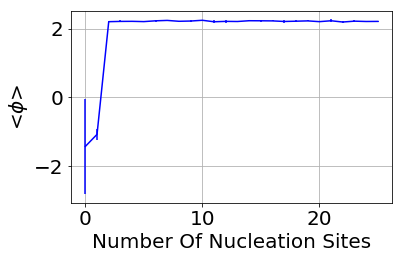

In [61]:
NumberNucSites = np.linspace(0,25,26) # Defining X-axis
#avephi=log(-1*(np.average(PhaseMatrixBOB[:,:,],axis=2)-24.96)) # Calculate Average Phi
#myphierror=np.std(log(flip(PhaseMatrixBOB)),axis=2) # Calculate Error in the Phi value
avephi=np.average(log(-(PhaseMatrixBOB)+24.98),axis=2) # Calculate Average Phi
myphierror=np.std(log(-(PhaseMatrixBOB)+24.98),axis=2) # Calculate Error in the Phi value
#plot(NumberNucSites,avephi,'or',linewidth=5) # plot red points
#plot(NumberNucSites,avephi,color='black',linewidth=1) # plot black line
errorbar(NumberNucSites,avephi,myphierror,uplims=False,lolims=False,color='blue') # add error bars
#ylim([-2,+1])
#xscale("log")
plt.grid(True) # add grid
ylabel('<$\phi$>');
xlabel("Number Of Nucleation Sites")
x_label_list=['0','5','10','15','20','25']
ax1.set_xticks([0,5,10,15,20,25]) # location in the axis to show the above ponits
ax1.set_xticklabels(x_label_list,fontsize=40)
tight_layout()

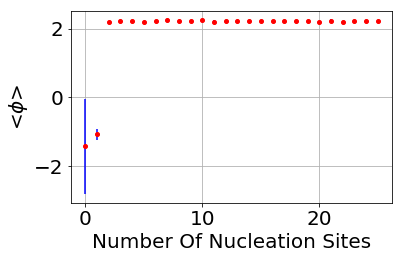

In [62]:
NumberNucSites = np.linspace(0,25,26) # Defining X-axis
avephi=np.average(log(-(PhaseMatrixBOB)+24.98),axis=2) # Calculate Average Phi
myphierror=np.std(log(-(PhaseMatrixBOB)+24.98),axis=2) # Calculate Error in the Phi value
plot(NumberNucSites,avephi,'or',markersize=4) # plot red points
errorbar(NumberNucSites,avephi,myphierror,fmt='none',uplims=False,lolims=False,color='blue') # add error bars
plt.grid(True) # add grid
ylabel('<$\phi$>');
xlabel("Number Of Nucleation Sites")
x_label_list=['0','5','10','15','20','25']
ax1.set_xticks([0,5,10,15,20,25]) # location in the axis to show the above ponits
ax1.set_xticklabels(x_label_list,fontsize=40)
tight_layout()

In [63]:
N1=np.linspace(5000,4950,26)
N1

array([5000., 4998., 4996., 4994., 4992., 4990., 4988., 4986., 4984.,
       4982., 4980., 4978., 4976., 4974., 4972., 4970., 4968., 4966.,
       4964., 4962., 4960., 4958., 4956., 4954., 4952., 4950.])

/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig5/fig5b/data/100x100/lm_files/x1_4.9960e+03_nucleated.lm


Text(0, 0.5, 'Number of $\\mathregular{Y}$')

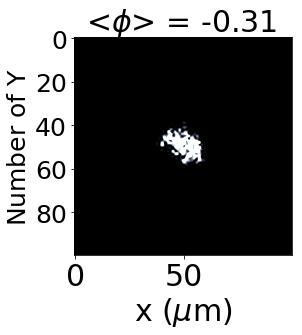

In [64]:
dir='/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig5/fig5b/data/100x100/lm_files/'
filename1 =dir+"x1_4.9960e+03_nucleated.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
lattice=list(fp1["/Simulations/%07d/Lattice"%replicate].keys())[-1]
lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
SumParticlesX2=np.sum(lfull==1,axis=3) #Count Particles of Type X1
TrasnPotSumPartX2=SumParticlesX2.transpose(2,0,1) # "Reshape matrix from 100x100x10 to 10x100x100"
title('<$\phi$> = -0.31 ', fontsize=30)
m=imshow(TrasnPotSumPartX2[0],interpolation='lanczos',vmin=0, vmax=5,cmap=cm.bone);
plt.ylabel('y ($\mu$m)',fontsize=30);plt.xlabel('x ($\mu$m)',fontsize=30)
plt.yticks(fontsize=30);plt.xticks(fontsize=30)
#divider = make_axes_locatable(ax2)
#cax = divider.append_axes("right", size="5%", pad=0.05)
#plt.colorbar(m, cax=cax)
plt.yticks(fontsize=25);
plt.ylabel('Number of $\mathregular{Y}$',fontsize=25)


Text(-0.15, 0.67, 'b')

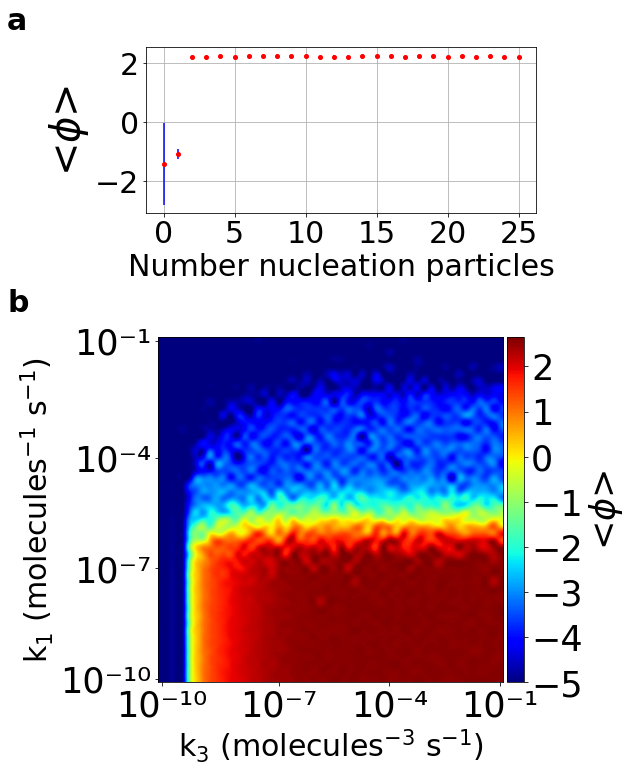

In [65]:
fig = plt.figure(figsize=(7,16))
gs = gridspec.GridSpec(nrows=4,ncols=2,figure=fig, width_ratios= [1,1],height_ratios=[1.5,1,1,1], wspace=1,hspace=1)
#########################
ax1 = fig.add_subplot(gs[1:3, 0:2]) #a
newmatrix=log(-1*(np.flip(np.average(temp2[:,:,1:4],axis=2),0)-38.271))
newmatrix[newmatrix<-5]=-5
m = ax1.imshow(newmatrix,cmap = 'jet',interpolation="lanczos")
#m = ax1.imshow(np.flip(np.average(temp1[:,:,1:6],axis=2),0),cmap = 'jet',vmin=37, vmax=38.28)
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=35)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=35)
plt.ylabel('$\mathregular{k_1}$ (molecules${^{-1}}$ s${^{-1}}$)',fontsize=30);plt.xlabel('$\mathregular{k_3}$ (molecules${^{-3}}$ s${^{-1}}$)',fontsize=30)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=35)
plt.ylabel('<$\phi$>',fontsize=35)

###################################################################################################################

ax2 = fig.add_subplot(gs[0:1, 0:2]) #b
NumberNucSites = np.linspace(0,25,26) # Defining X-axis
avephi=np.average(log(-(PhaseMatrixBOB)+24.98),axis=2) # Calculate Average Phi
myphierror=np.std(log(-(PhaseMatrixBOB)+24.98),axis=2) # Calculate Error in the Phi value
plot(NumberNucSites,avephi,'or',markersize=4) # plot red points
errorbar(NumberNucSites,avephi,myphierror,fmt='none',uplims=False,lolims=False,color='blue') # add error bars
plt.yticks(fontsize=30);plt.xticks((0,5,10,15,20,25),fontsize=30)
plt.grid(True)
ylabel('<$\phi$>',fontsize=40);
xlabel("Number nucleation particles",fontsize=30)
figtext(-0.15,0.915,"a", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(-0.15,0.670,"b", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
#tight_layout()
#plt.savefig('fig5-phase_separation-with-nuc_opt_2.png',bbox_inches='tight')

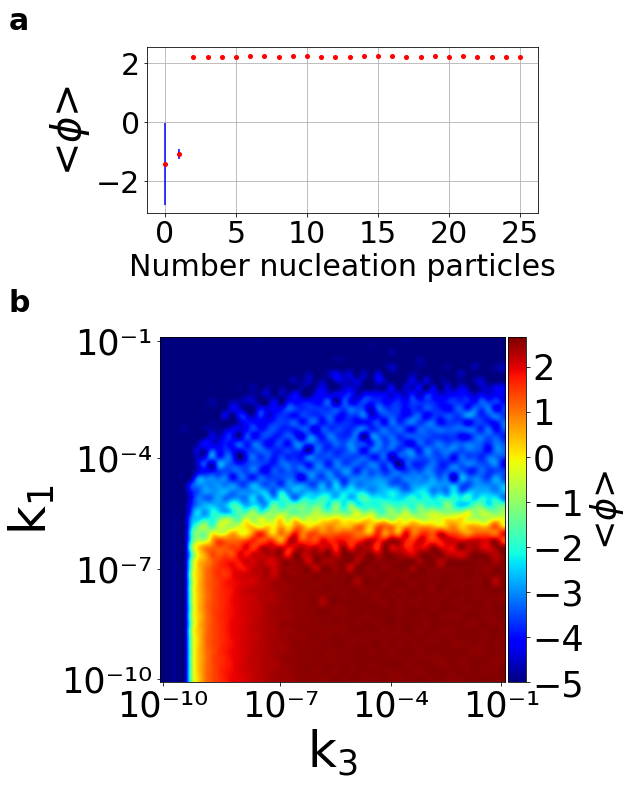

In [30]:
fig = plt.figure(figsize=(7,16))
gs = gridspec.GridSpec(nrows=4,ncols=2,figure=fig, width_ratios= [1,1],height_ratios=[1.5,1,1,1], wspace=1,hspace=1)
#########################
ax1 = fig.add_subplot(gs[1:3, 0:2]) #a
newmatrix=log(-1*(np.flip(np.average(temp2[:,:,1:4],axis=2),0)-38.271))
newmatrix[newmatrix<-5]=-5
m = ax1.imshow(newmatrix,cmap = 'jet',interpolation="lanczos")
#m = ax1.imshow(np.flip(np.average(temp1[:,:,1:6],axis=2),0),cmap = 'jet',vmin=37, vmax=38.28)
y_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_yticks([49,33,17,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=35)
x_label_list=['10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}\N{SUPERSCRIPT ZERO}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT SEVEN}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT FOUR}',\
              '10\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}']
ax1.set_xticks([0,17,33,49])
ax1.set_xticklabels(x_label_list,fontsize=35)
plt.ylabel('$\mathregular{k_1}$',fontsize=50);plt.xlabel('$\mathregular{k_3}$',fontsize=50)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=35)
plt.ylabel('<$\phi$>',fontsize=35)

###################################################################################################################

ax2 = fig.add_subplot(gs[0:1, 0:2]) #b
NumberNucSites = np.linspace(0,25,26) # Defining X-axis
avephi=np.average(log(-(PhaseMatrixBOB)+24.98),axis=2) # Calculate Average Phi
myphierror=np.std(log(-(PhaseMatrixBOB)+24.98),axis=2) # Calculate Error in the Phi value
plot(NumberNucSites,avephi,'or',markersize=4) # plot red points
errorbar(NumberNucSites,avephi,myphierror,fmt='none',uplims=False,lolims=False,color='blue') # add error bars
plt.yticks(fontsize=30);plt.xticks((0,5,10,15,20,25),fontsize=30)
plt.grid(True)
ylabel('<$\phi$>',fontsize=40);
xlabel("Number nucleation particles",fontsize=30)
figtext(-0.15,0.915,"a", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(-0.15,0.670,"b", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
#tight_layout()
plt.savefig('fig5-phase_separation_with_nuc.pdf',bbox_inches='tight')

### second option

ValueError: x and y must have same first dimension, but have shapes (201,) and (26, 1)

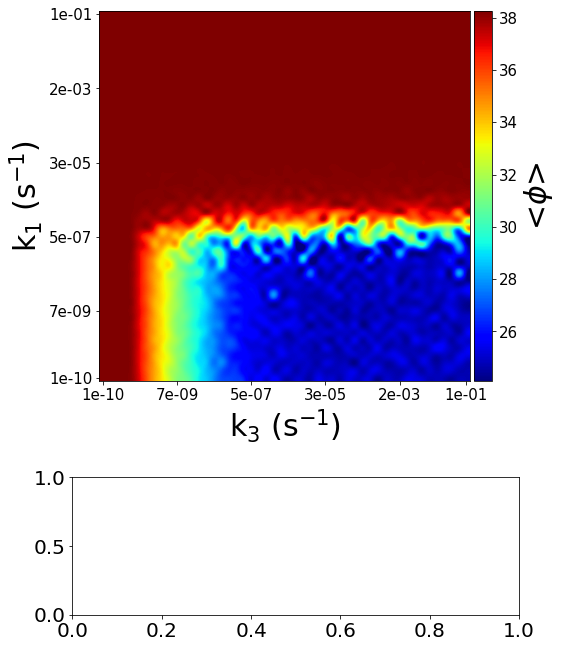

In [67]:
fig = plt.figure(figsize=(8,24))
gs = gridspec.GridSpec(nrows=6,ncols=2,figure=fig, width_ratios= [1,1],height_ratios=[1,1,1,1,1,1], wspace=0.6,hspace=0.7)
#########################
ax1 = fig.add_subplot(gs[0:2, 0:2]) #a
#sns.reset_orig()
#sns.set()
#m = ax1.imshow(np.flip(np.average(temp1[:,:,1:5],axis=2),0),cmap = 'jet',vmin=26, vmax=38.28,interpolation='bicubic')
#newmatrix=log(-1*(np.flip(np.average(temp2[:,:,1:2],axis=2),0)-np.max(np.average(temp1[:,:,1:6],axis=2))))

#newmatrix=log(-1*(np.flip(np.average(temp2[:,:,1:4],axis=2),0)-38.271))
#newmatrix[newmatrix<-5]=-5
m = ax1.imshow(np.flip(np.average(temp2[:,:,1:4],axis=2),0),cmap = 'jet',interpolation="lanczos")
#m = ax1.imshow(np.flip(np.average(temp1[:,:,1:6],axis=2),0),cmap = 'jet',vmin=37, vmax=38.28)
y_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]] # choose sampled points to show in the axis
ax1.set_yticks([49,40,30,20,10,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=15)
x_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]]
ax1.set_xticks([0,10,20,30,40,49])
ax1.set_xticklabels(x_label_list,fontsize=15)
plt.ylabel('$\mathregular{k_1}$ (s${^{-1}}$)',fontsize=30)
plt.xlabel('$\mathregular{k_3}$ (s${^{-1}}$)',fontsize=30)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=15)
plt.ylabel('<$\phi$>',fontsize=30)
#plt.ylabel('<$\phi$>',rotation='horizontal')
#figtext(0.450,0.860,"b",{'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'},color='w')
#figtext(0.450,0.785,"c", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'},color='w')
#figtext(0.450,0.740,"d", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'},color='w')
#figtext(0.450,0.700,"e", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'},color='w')
#tight_layout()
####################################
#sns.set()
ax2 = fig.add_subplot(gs[2:3, 0:2]) #b
NumberNucSites = np.linspace(0,201,201)
avephi=np.average(flip(PhaseMatrixBOB),axis=2)
myphierror=np.std(flip(PhaseMatrixBOB),axis=2)
plot(NumberNucSites,avephi,'or',linewidth=5,label="30x30")
legend(loc="upper right")
plot(NumberNucSites,avephi,color='black',linewidth=1)
errorbar(NumberNucSites,avephi,myphierror,uplims=False,lolims=False,color='blue')
ylim([9,12])
#xlim([0,50])
plt.grid(True)
ylabel('<$\phi$>',fontsize=30);
xlabel("# Nucleation Sites",fontsize=25)
#tight_layout()
#plt.savefig('phase_separation_100x100_with_nuc_examples_fig5_v2.pdf',bbox_inches='tight')

### third option

### second option 

ValueError: x and y must have same first dimension, but have shapes (201,) and (26, 1)

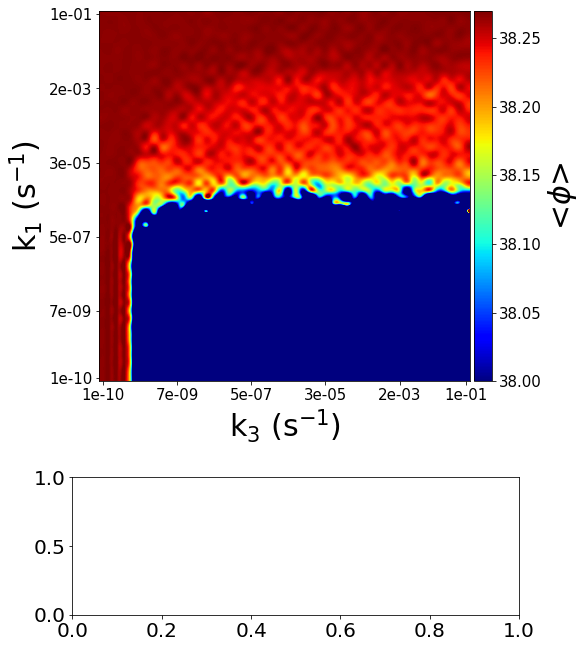

In [68]:
fig = plt.figure(figsize=(8,24))
gs = gridspec.GridSpec(nrows=6,ncols=2,figure=fig, width_ratios= [1,1],height_ratios=[1,1,1,1,1,1], wspace=0.6,hspace=0.7)
#########################
ax1 = fig.add_subplot(gs[0:2, 0:2]) #a
#sns.reset_orig()
#sns.set()
#m = ax1.imshow(np.flip(np.average(temp1[:,:,1:5],axis=2),0),cmap = 'jet',vmin=26, vmax=38.28,interpolation='bicubic')
#newmatrix=log(-1*(np.flip(np.average(temp2[:,:,1:2],axis=2),0)-np.max(np.average(temp1[:,:,1:6],axis=2))))

#newmatrix=log(-1*(np.flip(np.average(temp2[:,:,1:4],axis=2),0)-38.271))
#newmatrix[newmatrix<-5]=-5
m = ax1.imshow(np.flip(np.average(temp2[:,:,1:4],axis=2),0),cmap = 'jet',interpolation="lanczos",vmin=38,vmax=38.27)
#m = ax1.imshow(np.flip(np.average(temp1[:,:,1:6],axis=2),0),cmap = 'jet',vmin=37, vmax=38.28)
y_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]] # choose sampled points to show in the axis
ax1.set_yticks([49,40,30,20,10,0]) # location in the axis to show the above ponits
ax1.set_yticklabels(y_label_list,fontsize=15)
x_label_list=[seq[0],seq[10],seq[20],seq[30],seq[40],seq[49]]
ax1.set_xticks([0,10,20,30,40,49])
ax1.set_xticklabels(x_label_list,fontsize=15)
plt.ylabel('$\mathregular{k_1}$ (s${^{-1}}$)',fontsize=30)
plt.xlabel('$\mathregular{k_3}$ (s${^{-1}}$)',fontsize=30)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(m, cax=cax)
plt.yticks(fontsize=15)
plt.ylabel('<$\phi$>',fontsize=30)
#plt.ylabel('<$\phi$>',rotation='horizontal')
#figtext(0.450,0.860,"b",{'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'},color='w')
#figtext(0.450,0.785,"c", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'},color='w')
#figtext(0.450,0.740,"d", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'},color='w')
#figtext(0.450,0.700,"e", {'ha':'left','va':'top','fontsize':20, 'fontweight':'bold'},color='w')
#tight_layout()
####################################
#sns.set()
ax2 = fig.add_subplot(gs[2:3, 0:2]) #b
NumberNucSites = np.linspace(0,201,201)
avephi=np.average(flip(PhaseMatrixBOB),axis=2)
myphierror=np.std(flip(PhaseMatrixBOB),axis=2)
plot(NumberNucSites,avephi,'or',linewidth=5,label="30x30")
legend(loc="upper right")
plot(NumberNucSites,avephi,color='black',linewidth=1)
errorbar(NumberNucSites,avephi,myphierror,uplims=False,lolims=False,color='blue')
ylim([9,12])
#xlim([0,50])
plt.grid(True)
ylabel('<$\phi$>',fontsize=30);
xlabel("# Nucleation Sites",fontsize=25)
#tight_layout()
#plt.savefig('phase_separation_100x100_with_nuc_examples_fig5_v3.pdf',bbox_inches='tight')

In [67]:
np.max(np.average(temp2[:,:,1:4],axis=2))

38.270175011102616

In [68]:
np.min(np.average(temp2[:,:,1:4],axis=2))

24.093536555197073

In [33]:
np.min(np.average(temp1[:,:,1:16],axis=2))

26.164880960633955